<a href="https://colab.research.google.com/github/hdpark1208/ASDChatbot/blob/ASDC/ASD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 전처리

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4 MB 110 kB/s 
     |████████████████████████████████| 448 kB 31.1 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-07-20 02:34:31--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import urllib.request

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df = pd.read_table('/content/drive/MyDrive/Colab Notebooks/ASD/dataset.txt',header=None, error_bad_lines=False)

b'Skipping line 3173: expected 1 fields, saw 2\nSkipping line 3429: expected 1 fields, saw 2\n'


In [ ]:
df[['sentence','label']] = pd.DataFrame(df[0].str.split('|', 1).tolist())

In [ ]:
df = df.drop([0],axis=1)
df

,sentence,label
0,좌배 까는건 ㅇㅂ,1
1,집에 롱 패딩만 세 개다. 10년 더 입어야지 ㅋㅋ,0
2,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아,1
3,세탁이라고 봐도 된다,0
4,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ,1
...,...,...
5817,좌우 헬파이어 3개씩 6개 장착에 아파치보다 약하지만 20mm 기관포 장착임,0
5818,"세금 내놓으라고 데모질 중 ㅋㅋ간첩, 도둑놈 새끼들이 대통령 해처먹으니까 나도 같...",1
5819,너가 한 말 중에,0
5820,제갈대중 ㅇㅂ,0


In [ ]:
print(df.isnull().values.any())

False


In [ ]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=777)
print(len(train_data),len(test_data))

4075 1747


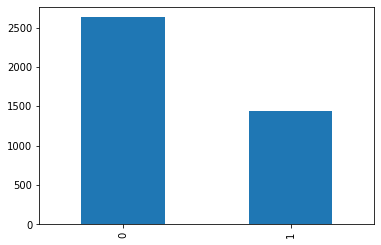

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

  label  count
0     0   2629
1     1   1446


In [ ]:
print(test_data.groupby('label').size().reset_index(name = 'count'))


  label  count
0     0   1149
1     1    598


In [ ]:
train_data['sentence'] = train_data['sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['sentence'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

sentence    11
label        0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
train_data.dropna(inplace=True)
print(train_data.isnull().sum())


sentence    0
label       0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_data['sentence'] = test_data['sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['sentence'].replace('', np.nan, inplace=True)
print(test_data.isnull().sum())

sentence    5
label       0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
test_data.dropna(inplace=True)
print(test_data.isnull().sum())

sentence    0
label       0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(len(train_data),len(test_data))

4064 1742


###형태소 분석

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
train_data['sentence'][:3]

4217                     중국무술은 격투기가 아미고 합맞춰서 하는 공연임
1155    여자가 개또라이년맞으니까 저런년 걍 방생하고 죽이면된다절대 남자가 백번 잘했다
56                                             카 성공
Name: sentence, dtype: object

In [ ]:
train_data

,sentence,label
4217,중국무술은 격투기가 아미고 합맞춰서 하는 공연임,0
1155,여자가 개또라이년맞으니까 저런년 걍 방생하고 죽이면된다절대 남자가 백번 잘했다,1
56,카 성공,0
4570,년 월 일 일베 박멸의 날이네,0
687,병신새끼,1
...,...,...
2687,솔찍히,0
5789,나씨 전라도성씨임,0
2119,네다음고졸,0
4017,단순한 논리인데 감성을 섞고 있노,0


In [ ]:
print(mecab.morphs(train_data.iloc[3][0]))
print(mecab.morphs(train_data['sentence'][4217]))


['년', '월', '일', '일', '베', '박멸', '의', '날', '이', '네']
['중국', '무술', '은', '격투기', '가', '아미', '고', '합', '맞춰서', '하', '는', '공연', '임']


In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게','.','ㅋㅋㅋ','ㅋㅋ','거','냐']

In [ ]:
train_data['tokenized'] = train_data['sentence'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test_data['tokenized'] = test_data['sentence'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_data['label'] = train_data['label'].astype('int')
test_data['label'] = test_data['label'].astype('int')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_data.dtypes

sentence     object
label         int64
tokenized    object
dtype: object

In [ ]:
train_data.dtypes

sentence     object
label         int64
tokenized    object
dtype: object

In [ ]:
bad = np.hstack(train_data[train_data.label==1]['tokenized'].values)
normal = np.hstack(train_data[train_data.label==0]['tokenized'].values)


In [ ]:
from collections import Counter

In [ ]:
bad_count = Counter(bad)
print(bad_count.most_common(20))

[('면', 267), ('새끼', 248), ('있', 212), ('아', 169), ('나', 167), ('안', 160), ('보', 147), ('일', 146), ('어', 135), ('같', 134), ('존나', 134), ('로', 131), ('노', 128), ('말', 127), ('만', 126), ('으로', 125), ('는데', 122), ('없', 121), ('되', 120), ('니', 119)]


In [ ]:
normal_count = Counter(normal)
print(normal_count.most_common(20))

[('있', 317), ('면', 302), ('나', 201), ('없', 198), ('안', 197), ('는데', 188), ('ㄷ', 166), ('으로', 152), ('에서', 151), ('어', 151), ('로', 146), ('아니', 146), ('만', 145), ('아', 143), ('말', 141), ('되', 140), ('음', 137), ('보', 124), ('일', 115), ('겠', 110)]


In [ ]:
train_data

,sentence,label,tokenized
4217,중국무술은 격투기가 아미고 합맞춰서 하는 공연임,0,"[중국, 무술, 격투기, 아미, 합, 맞춰서, 공연]"
1155,여자가 개또라이년맞으니까 저런년 걍 방생하고 죽이면된다절대 남자가 백번 잘했다,1,"[여자, 개, 또라이, 년, 맞, 으니까, 저런, 년, 걍, 방생, 죽이, 면, 된..."
56,카 성공,0,"[카, 성공]"
4570,년 월 일 일베 박멸의 날이네,0,"[년, 월, 일, 일, 베, 박멸, 날]"
687,병신새끼,1,"[병신, 새끼]"
...,...,...,...
2687,솔찍히,0,"[솔, 찍, 히]"
5789,나씨 전라도성씨임,0,"[나, 씨, 전라도, 성씨]"
2119,네다음고졸,0,"[다음, 고졸]"
4017,단순한 논리인데 감성을 섞고 있노,0,"[단순, 논리, 인데, 감성, 섞, 있, 노]"


### 정수 인코딩

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['tokenized'])

In [ ]:
#print(tokenizer.word_index)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 9554
등장 빈도가 1번 이하인 희귀 단어의 수: 5411
단어 집합에서 희귀 단어의 비율: 56.635963994138585
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 11.06430835292915


In [ ]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4144


In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(train_data['tokenized'])
X_train = tokenizer.texts_to_sequences(train_data['tokenized'])
X_test = tokenizer.texts_to_sequences(test_data['tokenized'])

In [ ]:
print(X_train[:3])

[[173, 1988, 1989], [102, 57, 879, 28, 68, 408, 129, 28, 237, 2635, 992, 1, 336, 378, 142, 447, 107, 43, 36], [880, 664]]


In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

3986
3986


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


리뷰의 최대 길이 : 288
리뷰의 평균 길이 : 10.911690918213749


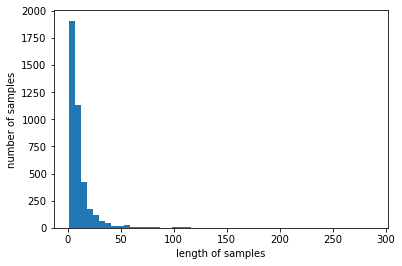

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 97.61665830406423


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

## LSTM

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
54/54 [==============================] - 10s 132ms/step - loss: 0.6183 - acc: 0.6666 - val_loss: 0.5643 - val_acc: 0.7281

Epoch 00001: val_acc improved from -inf to 0.72807, saving model to best_model.h5
Epoch 2/15
54/54 [==============================] - 7s 122ms/step - loss: 0.4341 - acc: 0.8112 - val_loss: 0.4630 - val_acc: 0.7857

Epoch 00002: val_acc improved from 0.72807 to 0.78571, saving model to best_model.h5
Epoch 3/15
54/54 [==============================] - 7s 122ms/step - loss: 0.2845 - acc: 0.8852 - val_loss: 0.4209 - val_acc: 0.8120

Epoch 00003: val_acc improved from 0.78571 to 0.81203, saving model to best_model.h5
Epoch 4/15
54/54 [==============================] - 7s 122ms/step - loss: 0.2075 - acc: 0.9166 - val_loss: 0.4644 - val_acc: 0.8133

Epoch 00004: val_acc improved from 0.81203 to 0.81328, saving model to best_model.h5
Epoch 5/15
54/54 [==============================] - 7s 122ms/step - loss: 0.1682 - acc: 0.9426 - val_loss: 0.5229 - val_acc: 0.817

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

55/55 [==============================] - 2s 19ms/step - loss: 0.5678 - acc: 0.8060

 테스트 정확도: 0.8060


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 나쁜말 입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 일상 언어 입니다.\n".format((1 - score) * 100))

### 문장 테스트

In [ ]:
sentiment_predict('아 시발 짜증나노')

99.65% 확률로 나쁜말 입니다.



In [ ]:
sentiment_predict('아닠ㅋㅋㅋㅋㅋ')


91.20% 확률로 일상 언어 입니다.



In [ ]:
sentiment_predict('장난치나 개빡치네')


97.04% 확률로 나쁜말 입니다.



In [ ]:
sentiment_predict('장난치냐')


82.88% 확률로 일상 언어 입니다.



In [ ]:
sentiment_predict('시12발놈아')


89.55% 확률로 나쁜말 입니다.



In [ ]:
sentiment_predict('경제개발5개년')


97.79% 확률로 일상 언어 입니다.



In [ ]:
sentiment_predict('2018년에는 개살구가 풍년이였다')


52.05% 확률로 나쁜말 입니다.



In [ ]:
sentiment_predict('18년 후에는 28살이 된다')


99.14% 확률로 일상 언어 입니다.



In [ ]:
sentiment_predict('야, 놈놈놈 봤냐?')


93.42% 확률로 일상 언어 입니다.



In [ ]:
sentiment_predict('너는 애미,애비도 없냐')


98.84% 확률로 나쁜말 입니다.



In [ ]:
sentiment_predict('너는 ㅇㅐ미,ㅇㅐ비도 없냐')


91.64% 확률로 일상 언어 입니다.



In [ ]:
sentiment_predict('ㅅㅂㄹㅁ')


97.34% 확률로 나쁜말 입니다.



In [ ]:
sentiment_predict('ㅈㄹㅗㅗㅋㅋㅋ')


95.16% 확률로 일상 언어 입니다.



In [ ]:
sentiment_predict('ㅈ까고있네ㅋㅋㅋ')


71.67% 확률로 일상 언어 입니다.



In [ ]:
sentiment_predict('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ')


94.24% 확률로 일상 언어 입니다.



In [ ]:
sentiment_predict('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅎㅎㅋㅎㅋㅎㅎㅋㅎㅋㅎㅋㅎㅋㅋ')


96.70% 확률로 나쁜말 입니다.



In [ ]:
sentiment_predict('ㅎㅎㅎㅎㅎㅋㅎㅋㅋㅋㅎㅎㅋㅎㅋ')


94.06% 확률로 나쁜말 입니다.



### 모델 저장

In [ ]:
model.save("ASD_LSTM.h5")